In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skbio.diversity.alpha import shannon
from highlight_text import fig_text, ax_text

In [2]:
prizes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-10-28/prizes.csv")

In [3]:
# Filter data for woman and man
gender_to_drop = ["non-binary", "transman"]
prizes = prizes[~prizes["gender"].isin(gender_to_drop)]

In [4]:
# Count occurrences of ethnicities
ethnicity_counts = prizes.groupby(["prize_year", "gender", "ethnicity"])[["gender", "ethnicity"]].value_counts().reset_index(name="ethnicity_counts")

# Shannon index by gender
diversity_score = (
    ethnicity_counts.groupby(["gender"])["ethnicity_counts"]
        .apply(lambda x: shannon(x))  # skbio 
        .reset_index(name='Shannon_index')
)

In [5]:
# Count occurences by year and gender
df = prizes.groupby(["prize_year", "gender"]).size().reset_index(name="count")

In [6]:
# Create subsets
female = df[df["gender"] == "woman"]
male = df[df["gender"] == "man"]

In [7]:
# Function to calculate YOY percentage change
def calculate_yoy_change(df):
    # First and last year
    first_year = df["prize_year"].min()
    last_year = df["prize_year"].max()

    # Values of first and last year
    value_first_year = df[df["prize_year"] == first_year]["count"].iloc[0]
    value_last_year = df[df["prize_year"] == last_year]["count"].iloc[0]

    # Calculate YOY percentage change
    yoy_change = ((value_last_year - value_first_year) / value_first_year) * 100
    return yoy_change

In [8]:
# Apply YOY percentage change function to both subsets
yoy_change_female = calculate_yoy_change(female)  
yoy_change_male = calculate_yoy_change(male)

In [9]:
# UK residency by gender
uk_res = prizes.groupby("gender")["uk_residence"].value_counts(normalize=True).reset_index(name="prop_uk_residence")

# UK residency values by gender
fres = uk_res["prop_uk_residence"].values[2]
mres = uk_res["prop_uk_residence"].values[0]

In [10]:
# First, last and max x, y values for scatter points (female)
first_xf = female["prize_year"].values[0]
first_yf = female["count"].values[0]
last_xf = female["prize_year"].values[-1]
last_yf = female["count"].values[-1]
max_xf = female.loc[female["count"].idxmax(), "prize_year"]
max_yf = female["count"].max()

In [11]:
# First, last, min and max x, y values for scatter points (male)
first_xm = male["prize_year"].values[0]
first_ym = male["count"].values[0]
last_xm = male["prize_year"].values[-1]
last_ym = male["count"].values[-1]
min_xm = male.loc[male["count"].idxmin(), "prize_year"]
min_ym = male["count"].min()
max_xm = male.loc[male["count"].idxmax(), "prize_year"]
max_ym = male["count"].max()

In [12]:
# Annotation text styles
fstyle1 = dict(size=10, color="#08B696", weight="bold", va="bottom")
fstyle2 = dict(size=10, color="#29D7B9", weight="bold", va="bottom")
mstyle1 = dict(size=10, color="#FC977E", weight="bold", va="bottom")
mstyle2 = dict(size=10, color="#EF7358", weight="bold", va="bottom")

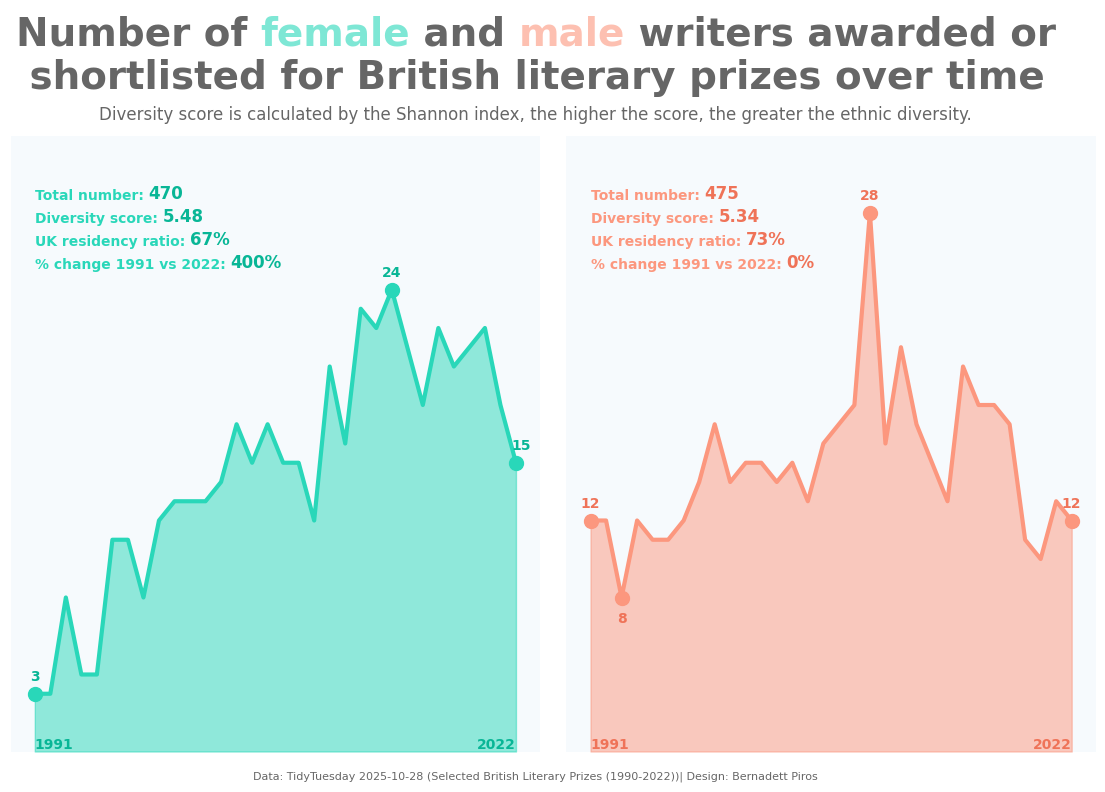

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
plt.subplots_adjust(wspace=0.05)

# Line and area chart (female)
ax1.plot(female["prize_year"], female["count"], color="#29D7B9", lw=3)
ax1.fill_between(female["prize_year"], female["count"], color="#29D7B9", alpha=0.5)

# Scatter points (female)
ax1.scatter(
    [first_xf, last_xf, max_xf],
    [first_yf, last_yf, max_yf],
    color="#29D7B9", s=100)

# List of x, y values for scatter annotations (female)
x1 = [first_xf, last_xf, max_xf]
y1 = [first_yf, last_yf, max_yf]

# Add text annotation to each scatter point (female)
for i in range(len(x1)):  
    # In the second iteration, adjust the x-position 
    x_pos = x1[i] + 0.35 if i == 1 else x1[i]
    ax1.text(
        x_pos, 
        y1[i] + 0.5,  
        s=f"{y1[i]}",       
        ha="center",
        **fstyle1
    )

# Add start year annotation (female)
ax1.text(
    first_xf,
    0,
    s=first_xf,      
    **fstyle1  
    )

# Add last year annotation (female)
ax1.text(
    last_xf,
    0,
    s=last_xf,    
    ha="right",  
    **fstyle1    
    )

# Add total number annotation (female)
ax_text(
    first_xf,
    28.5,
    s=f"Total number: <{female["count"].sum()}>",      
    **fstyle2,
    highlight_textprops=[
        {"color": "#08B696", "size": 12},          
    ],
    ax=ax1
    )

# Add diversity score annotation (female)
ax_text(
    first_xf,
    27.3,    
    s=f"Diversity score: <{round(diversity_score["Shannon_index"].values[1], 2)}>", 
    **fstyle2,
    highlight_textprops=[
        {"color": "#08B696", "size": 12},          
    ],
    ax=ax1
    )

# Add UK residency ratio annotation (female)
ax_text(
    first_xf,
    26.1,
    s=f"UK residency ratio: <{fres*100.:.0f}%>",      
    **fstyle2,
    highlight_textprops=[
        {"color": "#08B696", "size": 12},          
    ],
    ax=ax1
    )

# Add % change annotation (female)
ax_text(
    first_xf,
    24.9,
    s=f"% change {female["prize_year"].min()} vs {female["prize_year"].max()}: <{yoy_change_female:.0f}%>",      
    **fstyle2,
    highlight_textprops=[
        {"color": "#08B696", "size": 12},          
    ],
    ax=ax1
    )
        
# Line and area chart (male)
ax2.plot(male["prize_year"], male["count"], color="#FC977E", lw=3)
ax2.fill_between(male["prize_year"], male["count"], color="#FC977E", alpha=0.5)

# Scatter points (male)
ax2.scatter(
    [first_xm, last_xm, max_xm, min_xm],
    [first_ym, last_ym, max_ym, min_ym],
    color="#FC977E", s=100)

# List of x, y values for scatter annotations (male)
x2 = [first_xm, last_xm, max_xm]
y2 = [first_ym, last_ym, max_ym]

# Add text annotation to each scatter point (male)
for i in range(len(x1)):  
    ax2.text(
        x2[i], 
        y2[i] + 0.5,  
        s=f"{y2[i]}",         
        ha="center",  
        **mstyle2  
    )

# Add text annotation of min value (male)
ax2.text(
    min_xm,
    min_ym - 1.5,
    s=f"{min_ym}",      
    ha="center",  
    **mstyle2    
    )

# Add start year annotation (male)
ax2.text(
    first_xm,
    0,
    s=first_xm,      
    **mstyle2   
    )

# Add last year annotation (male)
ax2.text(
    last_xm,
    0,
    s=last_xm,   
    ha="right", 
    **mstyle2
    )

# Add total number annotation (male)
ax_text(
    first_xm,
    28.5,
    s=f"Total number: <{male["count"].sum()}>",     
    **mstyle1,
    highlight_textprops=[
        {"color": "#EF7358", "size": 12},          
    ],
    ax=ax2
    )

# Add diversity score annotation (male)
ax_text(
    first_xm,
    27.3,    
    s=f"Diversity score: <{round(diversity_score["Shannon_index"].values[0], 2)}>", 
    **mstyle1,
    highlight_textprops=[
        {"color": "#EF7358", "size": 12},          
    ],
    ax=ax2
    )

# Add UK residency ratio annotation (male)
ax_text(
    first_xm,
    26.1,
    s=f"UK residency ratio: <{mres*100.:.0f}%>",      
    **mstyle1,
    highlight_textprops=[
        {"color": "#EF7358", "size": 12},          
    ],
    ax=ax2
    )

# Add % change annotation (male)
ax_text(
    first_xm,
    24.9,
    s=f"% change {male["prize_year"].min()} vs {male["prize_year"].max()}: <{yoy_change_male:.0f}%>",   
    **mstyle1,
    highlight_textprops=[
        {"color": "#EF7358", "size": 12},          
    ],
    ax=ax2
    )

# Aestethics
fig.set_facecolor("white")
ax1.set_facecolor("#F6FAFD")
ax2.set_facecolor("#F6FAFD")
ax1.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax2.spines[["top", "right", "left", "bottom"]].set_visible(False)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_ylim(0, 32)

fig.text(0.5, 0.9, "Diversity score is calculated by the Shannon index, the higher the score, the greater the ethnic diversity.", size=12, alpha=0.6, ha="center")

# Title
fig_text(0.5, 1.03, s="Number of <female> and <male> writers awarded or\n shortlisted for British literary prizes over time",
         size=28, weight="bold", alpha=0.6, ha="center",
         highlight_textprops=[
             {"color": "#29D7B9"}, 
             {"color": "#FC977E"}
             ])

# Caption
fig.text(0.5, 0.075, "Data: TidyTuesday 2025-10-28 (Selected British Literary Prizes (1990-2022))| Design: Bernadett Piros", size=8, alpha=0.6, ha="center")

# Show the plot
plt.show()

#fig.savefig("2025-10-28.png", bbox_inches='tight', pad_inches=0.2)